#PROJECT

In [2]:
import json
import pandas as pd
import requests

# Effettua la richiesta GET all'API TfL
url = "https://api.tfl.gov.uk/AccidentStats/2019"  # Cambia l'anno a seconda dei dati che vuoi
response = requests.get(url)

# Carica la risposta in formato JSON
data = response.json()

# Converte il JSON in un DataFrame di pandas
df = pd.json_normalize(data)

# Salva il DataFrame in formato CSV
df.to_csv('incidenti_tfl_2019.csv', index=False)

In [3]:
df.head()

,$type,id,lat,lon,location,date,severity,borough,casualties,vehicles
0,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345828,51.508055,-0.153852,On Park Lane 20 metres north of The Junction W...,2019-02-19T17:50:00Z,Slight,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
1,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345829,51.436207,-0.127960,Streatham High Road junction with Chalcot Road,2019-01-15T21:45:00Z,Slight,Lambeth,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
2,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345830,51.526792,-0.124204,On Judd Street Near The Junction With Leight S...,2019-01-01T01:50:00Z,Slight,Camden,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
3,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345831,51.546385,-0.191054,On Broadhurst Gardens 10 metres east of The Ju...,2019-01-01T01:20:00Z,Serious,Camden,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
4,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345832,51.541119,-0.200074,On Willesden Lane Near The Junction With Alder...,2019-01-01T00:40:00Z,Slight,Brent,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...


In [4]:
df.describe()

,id,lat,lon
count,50626.000000,50626.000000,50626.000000
mean,544054.000000,51.509198,-0.118897
std,185715.647807,0.067383,0.141133
min,345828.000000,51.295233,-0.509795
25%,358484.250000,51.468225,-0.200805
50%,544054.000000,51.514006,-0.114336
75%,729623.750000,51.553555,-0.035484
max,742280.000000,51.691126,0.307909


In [5]:
df.drop(columns=['$type'], inplace=True)

# converting 'severity' in cardinal indicator
df['severity'] = df['severity'].map({'Slight': 1, 'Serious': 2, 'Fatal': 3})
df.head()

,id,lat,lon,location,date,severity,borough,casualties,vehicles
0,345828,51.508055,-0.153852,On Park Lane 20 metres north of The Junction W...,2019-02-19T17:50:00Z,1,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
1,345829,51.436207,-0.127960,Streatham High Road junction with Chalcot Road,2019-01-15T21:45:00Z,1,Lambeth,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
2,345830,51.526792,-0.124204,On Judd Street Near The Junction With Leight S...,2019-01-01T01:50:00Z,1,Camden,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
3,345831,51.546385,-0.191054,On Broadhurst Gardens 10 metres east of The Ju...,2019-01-01T01:20:00Z,2,Camden,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
4,345832,51.541119,-0.200074,On Willesden Lane Near The Junction With Alder...,2019-01-01T00:40:00Z,1,Brent,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...


In [6]:
borough_encoded = pd.get_dummies(df['borough'], prefix='borough', dtype=int)
df = pd.concat([df, borough_encoded], axis=1)
df.drop('borough', axis=1, inplace=True)

df.head()

,id,lat,lon,location,date,severity,casualties,vehicles,borough_Barking and Dagenham,borough_Barnet,...,borough_Lewisham,borough_Merton,borough_Newham,borough_Redbridge,borough_Richmond upon Thames,borough_Southwark,borough_Sutton,borough_Tower Hamlets,borough_Waltham Forest,borough_Wandsworth
0,345828,51.508055,-0.153852,On Park Lane 20 metres north of The Junction W...,2019-02-19T17:50:00Z,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,...,0,0,0,0,0,0,0,0,0,0
1,345829,51.436207,-0.127960,Streatham High Road junction with Chalcot Road,2019-01-15T21:45:00Z,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,...,0,0,0,0,0,0,0,0,0,0
2,345830,51.526792,-0.124204,On Judd Street Near The Junction With Leight S...,2019-01-01T01:50:00Z,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,345831,51.546385,-0.191054,On Broadhurst Gardens 10 metres east of The Ju...,2019-01-01T01:20:00Z,2,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,...,0,0,0,0,0,0,0,0,0,0
4,345832,51.541119,-0.200074,On Willesden Lane Near The Junction With Alder...,2019-01-01T00:40:00Z,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.drop('location', axis=1, inplace=True)

In [8]:
df.head()

,id,lat,lon,date,severity,casualties,vehicles,borough_Barking and Dagenham,borough_Barnet,borough_Bexley,...,borough_Lewisham,borough_Merton,borough_Newham,borough_Redbridge,borough_Richmond upon Thames,borough_Southwark,borough_Sutton,borough_Tower Hamlets,borough_Waltham Forest,borough_Wandsworth
0,345828,51.508055,-0.153852,2019-02-19T17:50:00Z,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,345829,51.436207,-0.127960,2019-01-15T21:45:00Z,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,345830,51.526792,-0.124204,2019-01-01T01:50:00Z,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,345831,51.546385,-0.191054,2019-01-01T01:20:00Z,2,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,345832,51.541119,-0.200074,2019-01-01T00:40:00Z,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,id,lat,lon,date,severity,casualties,vehicles,borough_Barking and Dagenham,borough_Barnet,borough_Bexley,...,borough_Lewisham,borough_Merton,borough_Newham,borough_Redbridge,borough_Richmond upon Thames,borough_Southwark,borough_Sutton,borough_Tower Hamlets,borough_Waltham Forest,borough_Wandsworth
0,345828,51.508055,-0.153852,2019-02-19 17:50:00+00:00,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,345829,51.436207,-0.127960,2019-01-15 21:45:00+00:00,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,345830,51.526792,-0.124204,2019-01-01 01:50:00+00:00,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,345831,51.546385,-0.191054,2019-01-01 01:20:00+00:00,2,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,345832,51.541119,-0.200074,2019-01-01 00:40:00+00:00,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: ylabel='Frequency'>

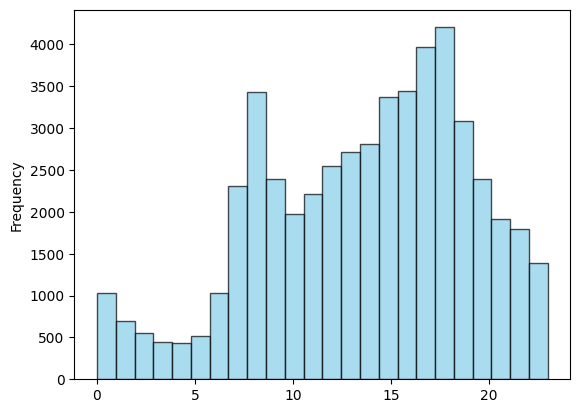

In [10]:
df['date'].dt.hour.plot.hist(bins=24, color='skyblue', edgecolor='black', alpha=0.7)

In [14]:
df['time_of_day'], bins = pd.qcut(df['date'].dt.hour, q=6, labels=['Early Morning', 'Morning', 'Midday', 'Afternoon', 'Evening', 'Night'], retbins=True)
print(bins)

[ 0.  8. 11. 15. 17. 19. 23.]


In [15]:
df.head()

,id,lat,lon,date,severity,casualties,vehicles,borough_Barking and Dagenham,borough_Barnet,borough_Bexley,...,borough_Merton,borough_Newham,borough_Redbridge,borough_Richmond upon Thames,borough_Southwark,borough_Sutton,borough_Tower Hamlets,borough_Waltham Forest,borough_Wandsworth,time_of_day
0,345828,51.508055,-0.153852,2019-02-19 17:50:00+00:00,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,0,...,0,0,0,0,0,0,0,0,0,Afternoon
1,345829,51.436207,-0.127960,2019-01-15 21:45:00+00:00,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,0,...,0,0,0,0,0,0,0,0,0,Night
2,345830,51.526792,-0.124204,2019-01-01 01:50:00+00:00,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,0,...,0,0,0,0,0,0,0,0,0,Early Morning
3,345831,51.546385,-0.191054,2019-01-01 01:20:00+00:00,2,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,0,...,0,0,0,0,0,0,0,0,0,Early Morning
4,345832,51.541119,-0.200074,2019-01-01 00:40:00+00:00,1,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,0,0,0,...,0,0,0,0,0,0,0,0,0,Early Morning


Now creating a separate dataframe for casualties and one for vehicles, in order to have more readable data.

In [ ]:
df_casualties = df.copy()
df_casualties = df_casualties.explode('casualties')
df_casualties.drop(columns=['lat', 'lat', 'lon', 'date', 'location', 'severity', 'borough', 'vehicles'], inplace=True)
df_casualties.head()

KeyError: "['location', 'borough'] not found in axis"

In [ ]:
type(df_casualties['casualties'].values)
df_casualties_normalized = pd.json_normalize(df_casualties['casualties'].values)
df_casualties_normalized.drop(columns=['$type'], inplace=True)
df_casualties_normalized.head()


,age,class,severity,mode,ageBand
0,58.0,Driver,Slight,Car,Adult
1,NaN,Passenger,Slight,Car,Unknown
2,NaN,Passenger,Slight,Car,Unknown
3,24.0,Driver,Slight,Car,Adult
4,21.0,Passenger,Slight,PedalCycle,Adult


In [ ]:
df_casualties_normalized['mode'].unique()

array(['Car', 'PedalCycle', 'Pedestrian', 'Taxi', 'PoweredTwoWheeler',
       'BusOrCoach', 'PrivateHire', 'OtherVehicle', 'GoodsVehicle'],
      dtype=object)

In [ ]:
df_casualties = df_casualties.join(df_casualties_normalized)
df_casualties.drop(columns=['casualties'], inplace=True)
df_casualties.head()

,id,age,class,severity,mode,ageBand
0,345828,58.0,Driver,Slight,Car,Adult
0,345828,58.0,Driver,Slight,Car,Adult
0,345828,58.0,Driver,Slight,Car,Adult
1,345829,NaN,Passenger,Slight,Car,Unknown
2,345830,NaN,Passenger,Slight,Car,Unknown


In [ ]:
df_vehicles = df.copy()
df_vehicles = df_vehicles.explode('vehicles')
df_vehicles.drop(columns=['lat', 'lat', 'lon', 'date', 'severity', 'borough', 'casualties'], inplace=True)

df_vehicles_normalized = pd.json_normalize(df_vehicles['vehicles'].values)
df_vehicles_normalized.drop(columns=['$type'], inplace=True)

df_vehicles = df_vehicles.join(df_vehicles_normalized)
df_vehicles.drop(columns=['vehicles'], inplace=True)
df_vehicles.head()

KeyError: "['location', 'borough'] not found in axis"

In [ ]:
df_vehicles['type'].unique()

TypeError: unhashable type: 'list'

In [ ]:
# collapse row with same id, add column with number of vehicles, add column with list of vehicles types
# it also sorts indexes idk why
df_vehicles = df_vehicles.groupby(['id']).agg({'type': lambda x: list(x)}).reset_index()
df_vehicles['num_vehicles'] = df_vehicles['type'].apply(lambda x: len(x))
df_vehicles

,id,type,num_vehicles
0,345828,"[Car, Car]",2
1,345829,"[Car, Car]",2
2,345830,"[Car, Car]",2
3,345831,[Car],1
4,345832,"[PedalCycle, PedalCycle]",2
...,...,...,...
50621,742276,[PedalCycle],1
50622,742277,[Car],1
50623,742278,"[PedalCycle, PedalCycle]",2
50624,742279,"[Taxi, Taxi]",2


# NOTES SECTION

## 3 OPTIONS:

* Forcasting
 * Determine out of the dataset what would happen
 * Predict accidents most likely
 * we could use past year data and compare directly with more recent data

* Corelating variables
 * Finding relationship betweetn different variables
 * expanding knowledge base to variables such as
 * Street direction, speed limit, street light, roundabout presence
 * tackle problems that normal statistics patterns or resarch can struggle with
 * Anomaly detection


* Optimization
 * Optimize the dataset
 * Most likely determining the best way to have the London transportation system
 * A simulation, hard to determine results




We could study what subjects are more at risk of severe accidents

What parts of the city are the most at risk

For insurance purposes


IDEA:
We could study the correlation between variables and accidents -> building a cost function to determine the reliability of a certain subject
Could be useful for INSURANCE COMPANIES

hi